In [1]:
# Autoreload possibly interferes with IntelliJ debugging
# %reload_ext autoreload
# %autoreload 2
import logging
from datetime import datetime
# class FlushHandler(logging.StreamHandler):
#     def emit(self, record):e
#         super().emit(record)
#         self.flush()
import io
import sys
import contextlib
import traceback
from tqdm.auto import tqdm

from importlib import reload

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
# log = lambda msg: logging.info(msg)
log = lambda msg: print(f"{datetime.today()} {msg}")

#assert False
global_force = False

import pandas as pd
import os

input_dir = "C:\\dev\\play\\brainwave-data"
stats_df = pd.read_csv(input_dir + os.path.sep + "stats.csv")

# Find Brainflow files that haven't been copied over

In [2]:
    import pytz
    from tqdm import tqdm
    import paramiko
    import re
    from datetime import datetime, timedelta
    import os
    import dotenv
    dotenv.load_dotenv()

    # Define the time window
    time_window = timedelta(minutes=10)

    # Define the remote server details
    hostname = os.getenv('SSH_HOST')
    username = os.getenv('SSH_USERNAME')
    password = os.getenv('SSH_PASSWORD')
    remote_dir = '/home/graham/dev/Brainwave-Data'
    local_dir = input_dir

    # Create an SSH client
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    ssh.connect(hostname, username=username, password=password, compress=True)

    # List files in the remote directory
    stdin, stdout, stderr = ssh.exec_command(f'ls {remote_dir}')
    remote_brainflow_files = [f for f in stdout.read().decode().splitlines() if f.endswith(".brainflow.csv")]


2025-03-20 07:09:42,189 - INFO - Connected (version 2.0, client OpenSSH_9.6)
2025-03-20 07:09:42,402 - INFO - Authentication (password) successful!


In [3]:
remote_brainflow_files

['2024-09-30-21-27-49.brainflow.csv',
 '2024-10-01-21-36-11.brainflow.csv',
 '2024-10-02-21-21-15.brainflow.csv',
 '2024-10-04-21-13-39.brainflow.csv',
 '2024-10-05-21-09-47.brainflow.csv',
 '2024-10-06-21-29-18.brainflow.csv',
 '2024-10-07-21-35-18.brainflow.csv',
 '2024-10-08-21-21-34.brainflow.csv',
 '2024-10-09-21-22-04.brainflow.csv',
 '2024-10-11-21-16-27.brainflow.csv',
 '2024-10-15-22-01-52.brainflow.csv',
 '2024-10-21-21-30-19.brainflow.csv',
 '2024-10-23-21-24-03.brainflow.csv',
 '2024-10-24-21-35-33.brainflow.csv',
 '2024-10-29-20-42-12.brainflow.csv',
 '2024-10-30-21-26-55.brainflow.csv',
 '2024-11-01-21-32-22.brainflow.csv',
 '2024-11-02-21-29-03.brainflow.csv',
 '2024-11-04-21-20-51.brainflow.csv',
 '2024-11-05-21-34-15.brainflow.csv',
 '2024-11-07-21-26-18.brainflow.csv',
 '2024-11-08-21-16-53.brainflow.csv',
 '2024-11-09-21-27-51.brainflow.csv',
 '2024-11-12-21-11-43.brainflow.csv',
 '2024-11-16-21-54-46.brainflow.csv',
 '2024-11-19-21-29-04.brainflow.csv',
 '2024-11-20

In [4]:
files_to_copy = remote_brainflow_files.copy()


for root, dirs, files in os.walk(input_dir):
    #for idx, file_name in enumerate(tqdm(dirs, desc="Converting Brainflow to FIF")):
    for idx, file_name in enumerate(files):
        full_input_filename = os.path.join(root, file_name)
        if ".brainflow.csv.bz2" in full_input_filename:
            #print(f"Processing {full_input_filename}")
            file_name_without_bz2 = file_name.removesuffix(".bz2")
            already_have = file_name_without_bz2 in remote_brainflow_files
            print(f"Already have {full_input_filename}: {already_have}")
            if already_have:
                files_to_copy.remove(file_name_without_bz2)



Already have C:\dev\play\brainwave-data\08-07-2024--22-51-16\08-07-2024--22-51-16.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\09-07-2024--22-52-25\09-07-2024--22-52-25.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-07-15-09-10-07\2024-07-15-09-10-07.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-07-16-23-14-52\2024-07-16-23-14-52.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-07-24-18-57-03\2024-07-24-18-57-03.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-03-21-10-58\2024-09-03-21-10-58.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-04-21-44-08\2024-09-04-21-44-08.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-08-21-01-39\2024-09-08-21-01-39.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-10-21-22-21\2024-09-10-21-22-21.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-11-

In [5]:
files_to_copy

['2025-03-19-21-45-19.brainflow.csv']

In [6]:
import os
import bz2
from tqdm import tqdm

sftp = ssh.open_sftp()
for file in files_to_copy:
    remote_file_path = remote_dir + "/" + file
    local_file_path = os.path.join(input_dir, file)
    log(f"Copying Brainflow backup remote:{remote_file_path} to {local_file_path}")

    # Get the file size
    remote_file_size = sftp.stat(remote_file_path).st_size

    with tqdm(total=remote_file_size, unit='B', unit_scale=True, desc=file, ascii=True) as pbar:
        local_file_path = os.path.join(input_dir, file)
    
        def callback(transferred_so_far, total_to_transfer):
            pbar.update(transferred_so_far - pbar.n)
    
        # Create a file-like object that writes to the local file
        with open(local_file_path, 'wb') as local_file:
            sftp.getfo(remote_file_path, local_file, callback=callback)
sftp.close()
ssh.close()


2025-03-20 07:09:44,206 - INFO - [chan 1] Opened sftp connection (server version 3)


2025-03-20 07:09:44.207315 Copying Brainflow backup remote:/home/graham/dev/Brainwave-Data/2025-03-19-21-45-19.brainflow.csv to C:\dev\play\brainwave-data\2025-03-19-21-45-19.brainflow.csv


2025-03-19-21-45-19.brainflow.csv: 100%|##########| 1.83G/1.83G [01:37<00:00, 18.9MB/s]
2025-03-20 07:11:21,350 - INFO - [chan 1] sftp session closed.


## Convert Brainflow files to FIF

In [7]:
def get_brainflow_compressed_filename(full_input_filename: str) -> str:
    full_output_dirname = webserver.output_dirname(full_input_filename)
    compressed_full_output_filename = str(os.path.join(full_output_dirname, os.path.basename(full_input_filename))) + '.bz2'
    return compressed_full_output_filename

In [8]:
from datetime import datetime

import webserver
import convert
# import zstandard as zstd
import os
import bz2
import time
import shutil

errors = []
processed = []

# Could get these working later
skip_list = ['2024-09-10-21-22-21']

def compress_bz2(input_file, output_file):
    start_time = time.time()
    with open(input_file, 'rb') as f_in:
        with bz2.open(output_file, 'wb', compresslevel=9) as f_out:
            shutil.copyfileobj(f_in, f_out)
    end_time = time.time()
    return end_time - start_time, os.path.getsize(output_file)

for root, dirs, files in os.walk(input_dir):
    #for idx, file_name in enumerate(tqdm(dirs, desc="Converting Brainflow to FIF")):
    for idx, file_name in enumerate(files):
        full_input_filename = os.path.join(root, file_name)
        try:
            if full_input_filename.endswith(".brainflow.csv"):
                full_output_dirname = webserver.output_dirname(full_input_filename)
                full_output_filename = str(os.path.join(full_output_dirname, 'raw.fif'))
                
                compressed_full_output_filename = get_brainflow_compressed_filename(full_input_filename)
                
                if not os.path.exists(compressed_full_output_filename):
                    log(f"Compressing file {full_input_filename} to " + compressed_full_output_filename)
                    processed.append("Compressing " + full_input_filename)
                    try:
                        os.mkdir(os.path.dirname(compressed_full_output_filename))
                    except:
                        pass
                    compress_bz2(full_input_filename, compressed_full_output_filename) 
                    
                if os.path.exists(full_output_filename):
                    log(f"Skipping file {full_input_filename} as {full_output_filename} and {compressed_full_output_filename} already exist")
                    continue
                should_skip = False
                for s in skip_list:
                    if s in full_input_filename:
                        log(f"Skipping file {full_input_filename}")
                        should_skip = True
                if not should_skip:
                    log(f"Processing file {full_input_filename}")
                    processed.append("Processing " + full_input_filename)
                    channels = None
                    date_time_str = os.path.basename(full_input_filename).removesuffix(".brainflow.csv")
                    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d-%H-%M-%S')
                    log(f"Date time obj: {date_time_obj} {date_time_obj > datetime(2025, 3, 12, 0, 0, 0)} {date_time_str}")
                    if (date_time_obj > datetime(2025, 3, 12, 0, 0, 0) and date_time_obj < datetime(2025, 3, 14, 0, 0, 0)):
                        channels = ['Fpz-M1', 'O2-M1']
                    elif (date_time_obj > datetime(2024, 9, 1, 0, 0, 0)):
                        channels = ['Fpz-M1']
        
                    if channels is not None:
                        log(f"Processing file {full_input_filename} with channels {channels}")
                        # Changing to gap-filling on 30th Nov
                        convert.convert_and_save_brainflow_file_with_gap_filling(log, full_input_filename, full_output_filename, channels)

        except Exception as e:
            msg = "Error processing file: " + full_input_filename
            log(msg)
            log(e)
            errors.append(msg)


2025-03-20 07:12:17.571352 Skipping file C:\dev\play\brainwave-data\2024-12-28-21-33-53.brainflow.csv as C:\dev\play\brainwave-data\2024-12-28-21-33-53\raw.fif and C:\dev\play\brainwave-data\2024-12-28-21-33-53\2024-12-28-21-33-53.brainflow.csv.bz2 already exist
2025-03-20 07:12:17.577475 Skipping file C:\dev\play\brainwave-data\2024-12-29-21-15-24.brainflow.csv as C:\dev\play\brainwave-data\2024-12-29-21-15-24\raw.fif and C:\dev\play\brainwave-data\2024-12-29-21-15-24\2024-12-29-21-15-24.brainflow.csv.bz2 already exist
2025-03-20 07:12:17.577475 Skipping file C:\dev\play\brainwave-data\2024-12-30-21-34-52.brainflow.csv as C:\dev\play\brainwave-data\2024-12-30-21-34-52\raw.fif and C:\dev\play\brainwave-data\2024-12-30-21-34-52\2024-12-30-21-34-52.brainflow.csv.bz2 already exist
2025-03-20 07:12:17.577475 Skipping file C:\dev\play\brainwave-data\2024-12-31-21-12-28.brainflow.csv as C:\dev\play\brainwave-data\2024-12-31-21-12-28\raw.fif and C:\dev\play\brainwave-data\2024-12-31-21-12-28\

c:\dev\Brainwave-Processor\convert.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idx_and_eeg_channels_and_timestamp['datetime'] = pd.to_datetime(idx_and_eeg_channels_and_timestamp['timestamp'],unit="s").dt.tz_localize('UTC')
Processing rows: 100%|██████████| 7558223/7558223 [00:05<00:00, 1322097.82it/s]


Gaps:  datetime
False    7452006
True         419
Name: count, dtype: int64


Processing rows:   8%|▊         | 576016/7452424 [00:04<01:12, 94715.26it/s] 

Gap 568038 start time:  2025-03-19 22:23:07.730701923+00:00
Gap 568038 end time:  2025-03-19 22:23:08.640957117+00:00
Gap 568121 start time:  2025-03-19 22:23:09.123270035+00:00
Gap 568121 end time:  2025-03-19 22:23:48.933377028+00:00
Gap 568150 start time:  2025-03-19 22:23:49.105597973+00:00
Gap 568150 end time:  2025-03-19 22:23:52.125065087+00:00
Gap 568540 start time:  2025-03-19 22:23:53.784018040+00:00
Gap 568540 end time:  2025-03-19 22:23:54.670465946+00:00
Gap 568614 start time:  2025-03-19 22:23:55.140438080+00:00
Gap 568614 end time:  2025-03-19 22:23:55.959359884+00:00


Processing rows:  14%|█▍        | 1077556/7452424 [00:08<00:47, 133485.93it/s]

Gap 1056405 start time:  2025-03-19 22:56:24.018709898+00:00
Gap 1056405 end time:  2025-03-19 22:56:25.039272070+00:00


Processing rows:  29%|██▉       | 2154091/7452424 [00:17<00:37, 142714.11it/s]

Gap 2131681 start time:  2025-03-20 00:07:58.942225933+00:00
Gap 2131681 end time:  2025-03-20 00:07:59.962774992+00:00


Processing rows:  58%|█████▊    | 4302289/7452424 [00:34<00:22, 142629.11it/s]

Gap 4282569 start time:  2025-03-20 02:31:08.853825092+00:00
Gap 4282569 end time:  2025-03-20 02:31:09.933198929+00:00


Processing rows:  59%|█████▊    | 4362256/7452424 [00:34<00:22, 138483.64it/s]

Gap 4339442 start time:  2025-03-20 02:34:57.011409044+00:00
Gap 4339442 end time:  2025-03-20 02:34:58.031081915+00:00


Processing rows:  72%|███████▏  | 5387719/7452424 [00:42<00:14, 139489.66it/s]

Gap 5357630 start time:  2025-03-20 03:42:43.842618942+00:00
Gap 5357630 end time:  2025-03-20 03:42:44.863472939+00:00


Processing rows:  73%|███████▎  | 5465027/7452424 [00:42<00:17, 112288.67it/s]

Gap 5450804 start time:  2025-03-20 03:48:57.008526087+00:00
Gap 5450804 end time:  2025-03-20 03:48:57.951323986+00:00
Gap 5458691 start time:  2025-03-20 03:49:29.571137905+00:00
Gap 5458691 end time:  2025-03-20 03:49:30.531560897+00:00
Gap 5458699 start time:  2025-03-20 03:49:30.592398882+00:00
Gap 5458699 end time:  2025-03-20 03:49:31.597059965+00:00
Gap 5458959 start time:  2025-03-20 03:49:32.641905069+00:00
Gap 5458959 end time:  2025-03-20 03:49:33.625083923+00:00
Gap 5459097 start time:  2025-03-20 03:49:34.236099005+00:00
Gap 5459097 end time:  2025-03-20 03:49:35.165769100+00:00
Gap 5465791 start time:  2025-03-20 03:50:01.983114004+00:00
Gap 5465791 end time:  2025-03-20 03:50:03.000188112+00:00
Gap 5465932 start time:  2025-03-20 03:50:03.544198036+00:00
Gap 5465932 end time:  2025-03-20 03:50:04.575159073+00:00
Gap 5466553 start time:  2025-03-20 03:50:07.074342966+00:00
Gap 5466553 end time:  2025-03-20 03:50:08.053154945+00:00
Gap 5467463 start time:  2025-03-20 03:5

Processing rows:  73%|███████▎  | 5476415/7452424 [00:43<00:24, 81207.42it/s] 

Gap 5471222 start time:  2025-03-20 03:50:37.973145008+00:00
Gap 5471222 end time:  2025-03-20 03:50:38.974126101+00:00
Gap 5472467 start time:  2025-03-20 03:50:43.963527918+00:00
Gap 5472467 end time:  2025-03-20 03:50:44.975864887+00:00
Gap 5472500 start time:  2025-03-20 03:50:45.097385883+00:00
Gap 5472500 end time:  2025-03-20 03:50:46.118581057+00:00
Gap 5472694 start time:  2025-03-20 03:50:46.924365997+00:00
Gap 5472694 end time:  2025-03-20 03:50:47.923883915+00:00
Gap 5472830 start time:  2025-03-20 03:50:48.519887923+00:00
Gap 5472830 end time:  2025-03-20 03:50:49.490195036+00:00
Gap 5472978 start time:  2025-03-20 03:50:50.128591061+00:00
Gap 5472978 end time:  2025-03-20 03:50:52.140394926+00:00
Gap 5473069 start time:  2025-03-20 03:50:52.504753113+00:00
Gap 5473069 end time:  2025-03-20 03:50:53.514432907+00:00
Gap 5473177 start time:  2025-03-20 03:50:53.964193106+00:00
Gap 5473177 end time:  2025-03-20 03:50:54.992219925+00:00
Gap 5473205 start time:  2025-03-20 03:5

Processing rows:  74%|███████▎  | 5485801/7452424 [00:43<00:45, 42975.79it/s]

Gap 5484032 start time:  2025-03-20 03:53:35.892921925+00:00
Gap 5484032 end time:  2025-03-20 03:53:36.858704090+00:00
Gap 5484437 start time:  2025-03-20 03:53:38.533446074+00:00
Gap 5484437 end time:  2025-03-20 03:53:39.547050953+00:00
Gap 5485100 start time:  2025-03-20 03:53:42.225917101+00:00
Gap 5485100 end time:  2025-03-20 03:53:43.241309881+00:00
Gap 5485134 start time:  2025-03-20 03:53:43.355122089+00:00
Gap 5485134 end time:  2025-03-20 03:53:44.369443893+00:00
Gap 5485712 start time:  2025-03-20 03:53:46.669878960+00:00
Gap 5485712 end time:  2025-03-20 03:53:47.693938017+00:00
Gap 5485823 start time:  2025-03-20 03:53:48.197149992+00:00
Gap 5485823 end time:  2025-03-20 03:53:49.151844025+00:00
Gap 5485846 start time:  2025-03-20 03:53:49.273680925+00:00
Gap 5485846 end time:  2025-03-20 03:53:50.321822882+00:00
Gap 5485856 start time:  2025-03-20 03:53:50.322128057+00:00
Gap 5485856 end time:  2025-03-20 03:53:51.397748947+00:00
Gap 5485861 start time:  2025-03-20 03:5

Processing rows:  74%|███████▎  | 5492899/7452424 [00:44<00:53, 36303.16it/s]

Gap 5490277 start time:  2025-03-20 03:54:51.967394114+00:00
Gap 5490277 end time:  2025-03-20 03:54:52.971031904+00:00
Gap 5490290 start time:  2025-03-20 03:54:53.032277107+00:00
Gap 5490290 end time:  2025-03-20 03:54:54.039376020+00:00
Gap 5490300 start time:  2025-03-20 03:54:54.100493908+00:00
Gap 5490300 end time:  2025-03-20 03:54:55.117537975+00:00
Gap 5490448 start time:  2025-03-20 03:54:55.665271997+00:00
Gap 5490448 end time:  2025-03-20 03:54:56.717571974+00:00
Gap 5490540 start time:  2025-03-20 03:54:57.081274986+00:00
Gap 5490540 end time:  2025-03-20 03:54:58.137947083+00:00
Gap 5490566 start time:  2025-03-20 03:54:58.200998068+00:00
Gap 5490566 end time:  2025-03-20 03:54:59.233875036+00:00
Gap 5490575 start time:  2025-03-20 03:54:59.297121048+00:00
Gap 5490575 end time:  2025-03-20 03:55:00.265268087+00:00
Gap 5490582 start time:  2025-03-20 03:55:00.321557999+00:00
Gap 5490582 end time:  2025-03-20 03:55:01.379206896+00:00
Gap 5490585 start time:  2025-03-20 03:5

Processing rows:  74%|███████▍  | 5498555/7452424 [00:44<01:05, 29679.68it/s]

Gap 5495269 start time:  2025-03-20 03:56:17.288980007+00:00
Gap 5495269 end time:  2025-03-20 03:56:18.316524982+00:00
Gap 5495328 start time:  2025-03-20 03:56:18.550801992+00:00
Gap 5495328 end time:  2025-03-20 03:56:19.552022934+00:00
Gap 5495450 start time:  2025-03-20 03:56:20.055459023+00:00
Gap 5495450 end time:  2025-03-20 03:56:21.063993931+00:00
Gap 5495502 start time:  2025-03-20 03:56:21.328895092+00:00
Gap 5495502 end time:  2025-03-20 03:56:22.351581097+00:00
Gap 5495504 start time:  2025-03-20 03:56:22.351610899+00:00
Gap 5495504 end time:  2025-03-20 03:56:23.371851921+00:00
Gap 5495505 start time:  2025-03-20 03:56:23.371851921+00:00
Gap 5495505 end time:  2025-03-20 03:56:24.381186008+00:00
Gap 5495739 start time:  2025-03-20 03:56:25.308604956+00:00
Gap 5495739 end time:  2025-03-20 03:56:26.342386961+00:00
Gap 5495749 start time:  2025-03-20 03:56:26.405204058+00:00
Gap 5495749 end time:  2025-03-20 03:56:27.414237976+00:00
Gap 5495808 start time:  2025-03-20 03:5

Processing rows:  74%|███████▍  | 5518306/7452424 [00:44<00:40, 47302.94it/s]

Gap 5518141 start time:  2025-03-20 03:58:31.589803934+00:00
Gap 5518141 end time:  2025-03-20 03:58:32.595024109+00:00
Gap 5518142 start time:  2025-03-20 03:58:32.595024109+00:00
Gap 5518142 end time:  2025-03-20 03:58:33.625689983+00:00
Gap 5518175 start time:  2025-03-20 03:58:33.751972914+00:00
Gap 5518175 end time:  2025-03-20 03:58:34.779977083+00:00
Gap 5518184 start time:  2025-03-20 03:58:34.845670938+00:00
Gap 5518184 end time:  2025-03-20 03:58:35.824734926+00:00
Gap 5518189 start time:  2025-03-20 03:58:35.887813091+00:00
Gap 5518189 end time:  2025-03-20 03:58:36.909121037+00:00
Gap 5518217 start time:  2025-03-20 03:58:36.972428083+00:00
Gap 5518217 end time:  2025-03-20 03:58:38.024616957+00:00
Gap 5518246 start time:  2025-03-20 03:58:38.143244982+00:00
Gap 5518246 end time:  2025-03-20 03:58:39.133352041+00:00
Gap 5518270 start time:  2025-03-20 03:58:39.297952890+00:00
Gap 5518270 end time:  2025-03-20 03:58:40.302690029+00:00
Gap 5518274 start time:  2025-03-20 03:5

Processing rows:  74%|███████▍  | 5525415/7452424 [00:45<01:12, 26605.98it/s]

Gap 5520155 start time:  2025-03-20 04:00:18.786358118+00:00
Gap 5520155 end time:  2025-03-20 04:00:19.831305981+00:00
Gap 5520174 start time:  2025-03-20 04:00:19.894162893+00:00
Gap 5520174 end time:  2025-03-20 04:00:20.910181046+00:00
Gap 5520177 start time:  2025-03-20 04:00:20.910264015+00:00
Gap 5520177 end time:  2025-03-20 04:00:21.956171989+00:00
Gap 5520196 start time:  2025-03-20 04:00:22.019342899+00:00
Gap 5520196 end time:  2025-03-20 04:00:24.061172009+00:00
Gap 5520199 start time:  2025-03-20 04:00:24.061204910+00:00
Gap 5520199 end time:  2025-03-20 04:00:25.052951097+00:00
Gap 5520245 start time:  2025-03-20 04:00:25.241678953+00:00
Gap 5520245 end time:  2025-03-20 04:00:26.310888052+00:00
Gap 5520249 start time:  2025-03-20 04:00:26.311013937+00:00
Gap 5520249 end time:  2025-03-20 04:00:27.332360983+00:00
Gap 5520250 start time:  2025-03-20 04:00:27.332360983+00:00
Gap 5520250 end time:  2025-03-20 04:00:28.333558083+00:00
Gap 5520268 start time:  2025-03-20 04:0

Processing rows:  85%|████████▌ | 6348313/7452424 [00:51<00:09, 118599.45it/s]

Gap 6324182 start time:  2025-03-20 04:54:18.820698023+00:00
Gap 6324182 end time:  2025-03-20 04:54:19.842221975+00:00


Processing rows: 100%|█████████▉| 7415458/7452424 [00:59<00:00, 133553.67it/s]

Gap 7399588 start time:  2025-03-20 06:05:53.743776083+00:00
Gap 7399588 end time:  2025-03-20 06:05:54.763681889+00:00


Processing rows: 100%|██████████| 7452424/7452424 [01:00<00:00, 124038.70it/s]
c:\dev\Brainwave-Processor\convert.py:151: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copied.fillna('', inplace=True)


2025-03-20 07:27:15.403293 Initial timestamp: 2025-03-19 21:45:19.286570072+00:00 from 1742420719.28657
2025-03-20 07:27:15.517560 Info <Info | 7 non-empty values
 bads: []
 ch_names: Fpz-M1
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2025-03-19 21:45:19 UTC
 nchan: 1
 projs: []
 sfreq: 250.0 Hz
>
2025-03-20 07:27:15.648262 Memory Usage: 2423.31 MB GC to 2421.31 MB
2025-03-20 07:27:15.648262 Saving to C:\dev\play\brainwave-data\2025-03-19-21-45-19\raw.fif


In [9]:
errors

[]

In [10]:
processed

['Compressing C:\\dev\\play\\brainwave-data\\2025-03-19-21-45-19.brainflow.csv',
 'Processing C:\\dev\\play\\brainwave-data\\2025-03-19-21-45-19.brainflow.csv']

## Run YASA pipeline on FIF files

2025-03-20 07:27:38,227 - WARNING - Hypnogram is SHORTER than data by 10.40 seconds. Padding hypnogram with last value to match data.size.
2025-03-20 07:27:57,616 - INFO - Using pre-trained classifier: c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
2025-03-20 07:27:57,923 - WARNING - Hypnogram is SHORTER than data by 10.40 seconds. Padding hypnogram with last value to match data.size.
2025-03-20 07:28:14,543 - ERROR - Wrong data amplitude for Fpz-M1 (trimmed STD = 1373.578). Unit of data MUST be uV! Channel will be skipped.
2025-03-20 07:28:14,543 - ERROR - Wrong data amplitude for O2-M1 (trimmed STD = 1483.211). Unit of data MUST be uV! Channel will be skipped.
2025-03-20 07:28:14,548 - WARNING - All channels have bad amplitude. Returning None.


("2025-03-20 07:27:17.578423 Processing file: C:\\dev\\play\\brainwave-data\\2025-03-12-21-43-35\\raw.fif\n2025-03-20 07:27:17.580842 Loading cached file C:\\dev\\play\\brainwave-data\\2025-03-12-21-43-35\\raw.yasa.csv\n2025-03-20 07:27:17.585560 Forced rebuild\n2025-03-20 07:27:17.585560 Loading MNE file C:\\dev\\play\\brainwave-data\\2025-03-12-21-43-35\\raw.fif\n2025-03-20 07:27:17.585560 Reading file C:\\dev\\play\\brainwave-data\\2025-03-12-21-43-35\\raw.fif\n2025-03-20 07:27:19.031770 Finished reading file C:\\dev\\play\\brainwave-data\\2025-03-12-21-43-35\\raw.fif\n2025-03-20 07:27:21.281463 Start date: 2025-03-12 21:43:35.967375+00:00 channels: ['Fpz-M1', 'O2-M1'] sfreq: 250.0\n2025-03-20 07:27:21.393839 Memory Usage: 607.79 MB GC to 607.79 MB\n2025-03-20 07:27:21.393839 Saving as EDF\n2025-03-20 07:27:26.231918 Memory Usage: 608.84 MB GC to 608.84 MB\n2025-03-20 07:27:26.231918 Running YASA\n2025-03-20 07:27:26.340172 Memory Usage: 608.84 MB GC to 608.84 MB\n2025-03-20 07:28:1

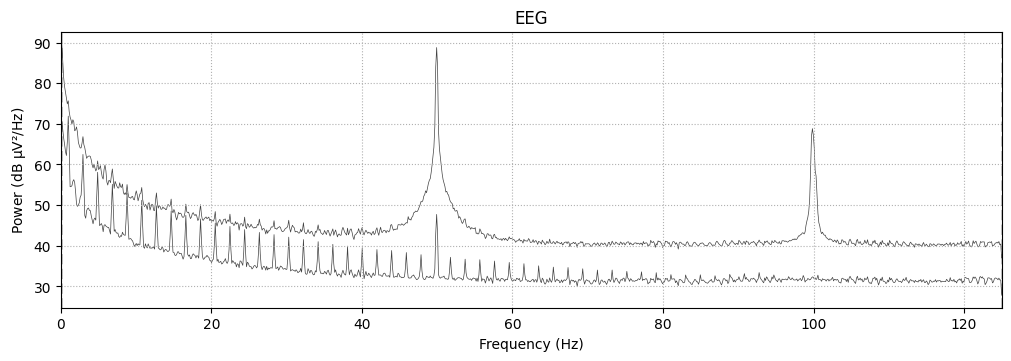

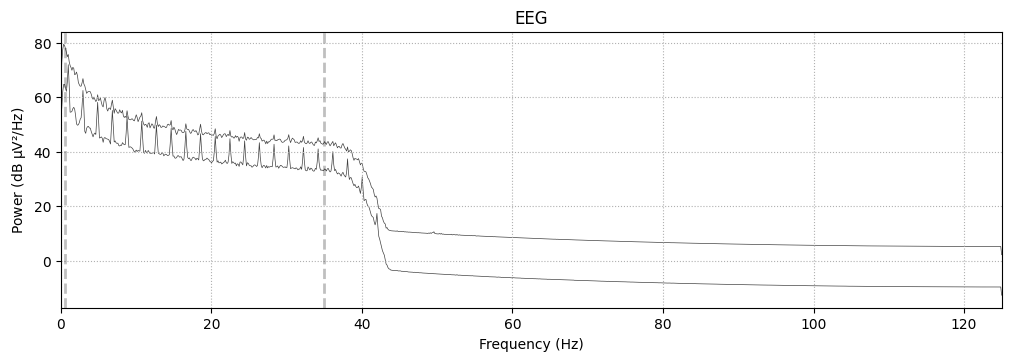

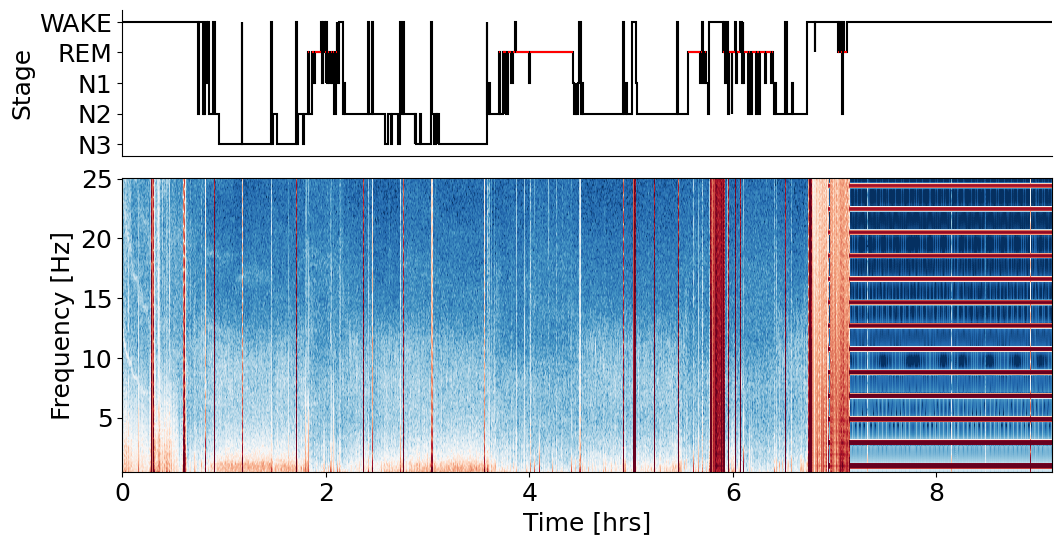

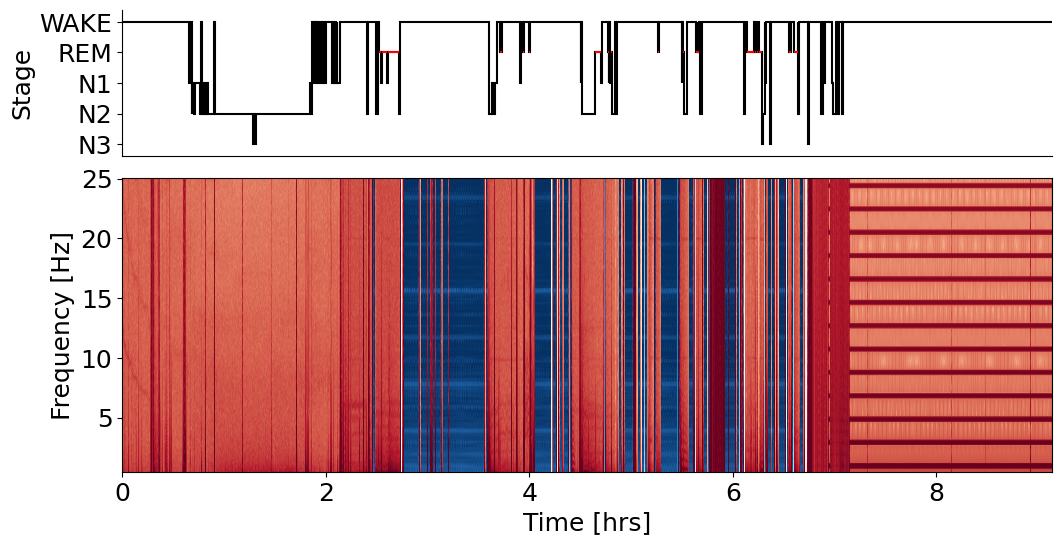

In [11]:
import pandas as pd
import run_feature_pipeline
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

errors = []
dataframes = []

# Could get these working later
skip_list = ['2024-07-23-22-40-25', '2024-07-28-22-29-49', '2024-09-18-21-25-08', '2024-09-18-21-28-11', '2024-09-19-21-29-42']
import io
import sys
import contextlib
import traceback
from importlib import reload

reload(run_feature_pipeline)

def process_file(root, dir_name, force=False):
    output_buffer = io.StringIO()
    with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):

        try:
            input_file = os.path.join(root, dir_name, "raw.fif")
            if dir_name in skip_list:
                log(f"Skipping {dir_name}: {input_file}")
                return None, False, output_buffer.getvalue(), "Skipped"

            log(f"Processing file: {input_file}")
            if os.path.exists(input_file):
                yasa_df, cached = run_feature_pipeline.cached_pipeline(log, input_file, force or global_force)
                return yasa_df, cached, output_buffer.getvalue(), True
            else:
                log(f"File not found: {input_file}")
                return None, False, output_buffer.getvalue(), "File not found"

        except Exception as e:
            msg = f"Error processing file: {input_file} - {e}"
            log(msg)
            errors.append(msg)
            return None, False, output_buffer.getvalue(), "Error: " + str(e)

# Testing
yasa_df, cached, stdout, success_or_msg = process_file("C:\\dev\\play\\brainwave-data", "2025-03-12-21-43-35", True)
stdout, success_or_msg

In [12]:
results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

from tqdm.auto import tqdm

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="YASA pipeline")):
    yasa_df, cached, stdout, success_or_msg = process_file(input_dir, dir_name)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

YASA pipeline:   0%|          | 0/159 [00:00<?, ?it/s]

2025-03-20 07:28:32,289 - WARNING - Hypnogram is SHORTER than data by 24.30 seconds. Padding hypnogram with last value to match data.size.


,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,2025-03-20 07:28:16.168871 Processing file: C:...,File not found
1,09-07-2024--22-52-25,False,2025-03-20 07:28:16.171893 Processing file: C:...,File not found
2,2024-07-08-22-51-16,True,2025-03-20 07:28:16.173708 Processing file: C:...,True
3,2024-07-11-22-46-18,True,2025-03-20 07:28:16.183937 Processing file: C:...,True
4,2024-07-12-22-38-58,True,2025-03-20 07:28:16.201305 Processing file: C:...,True
...,...,...,...,...
154,2025-03-12-21-43-35,True,2025-03-20 07:28:17.664751 Processing file: C:...,True
155,2025-03-18-21-40-28,True,2025-03-20 07:28:17.668795 Processing file: C:...,True
156,2025-03-19-21-45-19,False,2025-03-20 07:28:17.677046 Processing file: C:...,True
157,compressed_files,False,2025-03-20 07:29:00.951683 Processing file: C:...,File not found


# Artifacts

In [13]:
import os
import io

from importlib import reload
import notebooks.EEGArtifacts.eeg_artifacts
reload(notebooks.EEGArtifacts.eeg_artifacts)


# Testing
artifacts_df, cached, stdout, success_or_msg = notebooks.EEGArtifacts.eeg_artifacts.process_artifacts("C:\\dev\\play\\brainwave-data", "2025-02-12-20-34-56", False)
stdout, success_or_msg

('Processing file: C:\\dev\\play\\brainwave-data\\2025-02-12-20-34-56\\raw.fif\n',
 True)

In [14]:
from importlib import reload
import notebooks.EEGArtifacts.eeg_artifacts
reload(notebooks.EEGArtifacts.eeg_artifacts)

results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Artifacts pipeline")):
# for idx, dir_name in enumerate(dirs):
    # print(dir_name)
    artifacts_df, cached, stdout, success_or_msg = notebooks.EEGArtifacts.eeg_artifacts.process_artifacts(input_dir, dir_name, global_force)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

Artifacts pipeline:   0%|          | 0/159 [00:00<?, ?it/s]

,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,Processing file: C:\dev\play\brainwave-data\08...,File not found C:\dev\play\brainwave-data\08-0...
1,09-07-2024--22-52-25,False,Processing file: C:\dev\play\brainwave-data\09...,File not found C:\dev\play\brainwave-data\09-0...
2,2024-07-08-22-51-16,True,Processing file: C:\dev\play\brainwave-data\20...,True
3,2024-07-11-22-46-18,True,Processing file: C:\dev\play\brainwave-data\20...,True
4,2024-07-12-22-38-58,True,Processing file: C:\dev\play\brainwave-data\20...,True
...,...,...,...,...
154,2025-03-12-21-43-35,True,Processing file: C:\dev\play\brainwave-data\20...,True
155,2025-03-18-21-40-28,True,Processing file: C:\dev\play\brainwave-data\20...,True
156,2025-03-19-21-45-19,False,Processing file: C:\dev\play\brainwave-data\20...,True
157,compressed_files,False,Processing file: C:\dev\play\brainwave-data\co...,File not found C:\dev\play\brainwave-data\comp...


# Physiological pipeline

In [17]:
import traceback
import os

from importlib import reload
import run_physical_features_pipeline
reload(run_physical_features_pipeline)
import io
import contextlib
from datetime import datetime, timedelta


def process_file_for_physical(root, dir_name, force=False):
    output_buffer = io.StringIO()
    with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):
        input_fif_file = os.path.join(root, dir_name, "raw.fif")
        input_csv_file = os.path.join(root, dir_name, "raw.yasa.csv")
    #     try:
        if os.path.exists(input_csv_file):
            yasa_df = pd.read_csv(input_csv_file)
            physical_features_df_30s, physical_features_df_1s, cached = run_physical_features_pipeline.cached_physical_features_pipeline(log, input_fif_file, yasa_df, force or global_force)
            return physical_features_df_30s, physical_features_df_1s, cached, output_buffer.getvalue(), True
        else:
            log(f"File not found: {input_fif_file} or {input_csv_file}")
            return None, None, False, output_buffer.getvalue(), "File not found"
        # except Exception as e:
        #     return None, False, output_buffer.getvalue(), (str(e) + " " + traceback.format_exc())

# Testing
# physical_features_df_30s, physical_features_df_1s, cached, stdout, success_or_msg = process_file_for_physical("C:\\dev\\play\\brainwave-data", "2025-03-05-21-59-37", True)
# display(stdout)
# display(success_or_msg)
# display(physical_features_df_30s)

"2025-03-20 07:41:10.014560 Generating 30s data and saving to: C:\\dev\\play\\brainwave-data\\2025-03-05-21-59-37\\raw.physical_features.csv\n2025-03-20 07:41:10.745964 start_time: 2025-03-05T21:59:37.256Z, end_time: 2025-03-06T06:49:37.256Z, misalignment: 7\nc:\\Users\\graha\\.conda\\envs\\3.10-tf\\lib\\site-packages\\urllib3\\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'examined-life.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings\n  warnings.warn(\nc:\\Users\\graha\\.conda\\envs\\3.10-tf\\lib\\site-packages\\urllib3\\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'examined-life.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings\n  warnings.warn(\nc:\\Users\\graha\\.conda\\envs\\3.10-tf\\lib\\site-packages\\u

True

,DatabaseTimestamp,HR,Temp,O2,Movement,Timestamp
0,2025-03-05 21:59:37+00:00,77.0,37.02,NaN,NaN,2025-03-05 21:59:37.256705046+00:00
1,2025-03-05 22:00:07+00:00,77.0,37.03,NaN,NaN,2025-03-05 22:00:07.256705046+00:00
2,2025-03-05 22:00:37+00:00,77.0,37.03,NaN,NaN,2025-03-05 22:00:37.256705046+00:00
3,2025-03-05 22:01:07+00:00,NaN,37.04,NaN,NaN,2025-03-05 22:01:07.256705046+00:00
4,2025-03-05 22:01:37+00:00,NaN,37.05,NaN,NaN,2025-03-05 22:01:37.256705046+00:00
...,...,...,...,...,...,...
1056,2025-03-06 06:47:37+00:00,NaN,36.38,97.0,1.0,2025-03-06 06:47:37.256705046+00:00
1057,2025-03-06 06:48:07+00:00,NaN,36.38,97.0,1.0,2025-03-06 06:48:07.256705046+00:00
1058,2025-03-06 06:48:37+00:00,NaN,36.38,NaN,NaN,2025-03-06 06:48:37.256705046+00:00
1059,2025-03-06 06:49:07+00:00,NaN,36.39,NaN,NaN,2025-03-06 06:49:07.256705046+00:00


In [16]:
from tqdm.auto import tqdm

results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Physiological pipeline")):
    _, _, cached, stdout, success_or_msg = process_file_for_physical(input_dir, dir_name)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

Physiological pipeline:   0%|          | 0/159 [00:00<?, ?it/s]

ValueError: not enough values to unpack (expected 5, got 4)

# Post-YASA pipeline

In [47]:
import traceback
import os

from importlib import reload
import run_post_yasa_pipeline
reload(run_post_yasa_pipeline)
import yasa_features
reload(yasa_features)


def process_file_for_post_yasa(root, dir_name, force=False):
    output_buffer = io.StringIO()
    # with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):

    input_fif_file = os.path.join(root, dir_name, "raw.fif")
    input_csv_file = os.path.join(root, dir_name, "raw.yasa.csv")
    artifacts_csv_path = os.path.join(root, dir_name, "raw.artifacts.csv")

    try:
        log(f"Processing file: " + input_fif_file)
        if os.path.exists(input_fif_file) and os.path.exists(input_csv_file) and os.path.exists(artifacts_csv_path):
            yasa_df = pd.read_csv(input_csv_file)
            artifacts_df = pd.read_csv(artifacts_csv_path)
            post_yasa_df, cached = run_post_yasa_pipeline.cached_post_yasa_pipeline(log, input_fif_file, yasa_df, stats_df, artifacts_df, force or global_force)
            return post_yasa_df, cached, output_buffer.getvalue(), True
        else:
            log(f"File not found: {input_fif_file} or {input_csv_file}")
            return None, False, output_buffer.getvalue(), "File not found"
    except Exception as e:
        traceback.print_exc()
        return None, False, output_buffer.getvalue(), e

# Testing
# post_yasa_df, cached, stdout, success_or_msg = process_file_for_post_yasa("C:\\dev\\play\\brainwave-data", "2024-07-08-22-51-16", True)
# display(stdout)
# display(success_or_msg)

In [48]:
results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

all_post_yasa_dfs = []

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Post YASA pipeline")):
    post_yasa_df, cached, stdout, success_or_msg = process_file_for_post_yasa(input_dir, dir_name)
    all_post_yasa_dfs.append(post_yasa_df)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]
    # error_count = len(results[results['success_or_msg'] != True])
    # if (error_count > 5):
    #     log(f"Stopping due to {error_count} errors")
    #     break

results


Post YASA pipeline:   0%|          | 0/158 [00:00<?, ?it/s]

2025-03-19 11:59:14.839428 Processing file: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif
2025-03-19 11:59:14.839428 File not found: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif or C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.yasa.csv
2025-03-19 11:59:14.839428 Processing file: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif
2025-03-19 11:59:14.839428 File not found: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif or C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.yasa.csv
2025-03-19 11:59:14.849443 Processing file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.artifacts.csv
2025-03-19 11:59:14.859492 Loading cached file C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.post_yasa.csv
2025-03-19 11:59:15.942605 Processing file: C:\dev\play\brainwave-data\2024-07-11-22-46-18\raw.fif
YASA file: C

Traceback (most recent call last):
  File "C:\Users\graha\AppData\Local\Temp\ipykernel_47924\2218523281.py", line 23, in process_file_for_post_yasa
    artifacts_df = pd.read_csv(artifacts_csv_path)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\readers.py", line 1898, in _make_engine
    return mapping[engine](f, **self.options)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\c_parser_wrapper.py", line 93, in __init__
    self._reader = pa

2025-03-19 12:00:10.936523 Processing file: C:\dev\play\brainwave-data\2024-12-16-21-26-57\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-12-16-21-26-57\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-12-16-21-26-57\raw.artifacts.csv
2025-03-19 12:00:10.961783 Loading cached file C:\dev\play\brainwave-data\2024-12-16-21-26-57\raw.post_yasa.csv
2025-03-19 12:00:11.344276 Processing file: C:\dev\play\brainwave-data\2024-12-17-21-24-11\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-12-17-21-24-11\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-12-17-21-24-11\raw.artifacts.csv
2025-03-19 12:00:11.353968 Loading cached file C:\dev\play\brainwave-data\2024-12-17-21-24-11\raw.post_yasa.csv
2025-03-19 12:00:11.608156 Processing file: C:\dev\play\brainwave-data\2024-12-18-21-32-18\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-12-18-21-32-18\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-12-18-21-32-18\raw.artifacts.csv
2025-03-19 12:00:11.625

c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
Traceback (most recent call last):
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\core\indexes\base.py", line 3

2025-03-19 12:01:21.860023 Processing file: C:\dev\play\brainwave-data\2025-03-08-21-45-12\raw.fif
YASA file: C:\dev\play\brainwave-data\2025-03-08-21-45-12\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2025-03-08-21-45-12\raw.artifacts.csv
2025-03-19 12:01:21.867047 Loading cached file C:\dev\play\brainwave-data\2025-03-08-21-45-12\raw.post_yasa.csv
2025-03-19 12:01:21.976606 Processing file: C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.fif
YASA file: C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.artifacts.csv
2025-03-19 12:01:21.980903 Loading cached file C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.post_yasa.csv
2025-03-19 12:01:22.201651 YASA file C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.yasa.csv mod date 2025-03-19 11:57:12.163147 is > 2025-03-19 11:19:34.546183, rebuilding
2025-03-19 12:01:22.201651 Loading MNE file C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.fi

c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', 

    Using multitaper spectrum estimation with 7 DPSS windows


c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterat

    Using multitaper spectrum estimation with 7 DPSS windows


c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:188: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', 

    Using multitaper spectrum estimation with 7 DPSS windows


c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterat

2025-03-19 12:03:17.816358 All done! C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.fif
2025-03-19 12:03:17.834978 Saving to: C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.post_yasa.csv
2025-03-19 12:03:18.871258 Processing file: C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.fif
YASA file: C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.artifacts.csv
2025-03-19 12:03:18.872357 No cached file C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.post_yasa.csv, rebuilding
2025-03-19 12:03:18.872357 Loading MNE file C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.fif
2025-03-19 12:03:18.872357 Reading file C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.fif
2025-03-19 12:03:19.226843 Finished reading file C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.fif
2025-03-19 12:03:20.197457 Memory Usage: 3354.00 MB GC to 3354.00 MB
2025-03-19 12:03:20.197457 Extracting YASA features
    Using multit

c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterat

2025-03-19 12:03:47.378765 All done! C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.fif
2025-03-19 12:03:47.389490 Saving to: C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.post_yasa.csv
2025-03-19 12:03:47.915426 Processing file: C:\dev\play\brainwave-data\compressed_files\raw.fif
2025-03-19 12:03:47.915426 File not found: C:\dev\play\brainwave-data\compressed_files\raw.fif or C:\dev\play\brainwave-data\compressed_files\raw.yasa.csv
2025-03-19 12:03:47.915426 Processing file: C:\dev\play\brainwave-data\nonnight\raw.fif
2025-03-19 12:03:47.916426 File not found: C:\dev\play\brainwave-data\nonnight\raw.fif or C:\dev\play\brainwave-data\nonnight\raw.yasa.csv


,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,,File not found
1,09-07-2024--22-52-25,False,,File not found
2,2024-07-08-22-51-16,True,,True
3,2024-07-11-22-46-18,True,,True
4,2024-07-12-22-38-58,True,,True
...,...,...,...,...
153,2025-03-08-21-45-12,True,,True
154,2025-03-12-21-43-35,False,,True
155,2025-03-18-21-40-28,False,,True
156,compressed_files,False,,File not found


# Recalculate scalings
N.b. can be run frequently but will only be picked up by new runs.  Maybe worth occasionally regenerating all old files.
And yes, for new features have to rerun the pipeline on everything, then generate the stats here, then rerun the pipeline again on everything to have them use those.

In [49]:
# post_yasa_dfs_combined = pd.concat(all_post_yasa_dfs)

In [50]:
# from scaling import only_eeg

# only_eeg_cols = list(only_eeg(post_yasa_dfs_combined).columns)
# assert any(col.startswith("Main") for col in only_eeg_cols), "No column starting with 'Main' found in only_eeg_cols"

In [51]:
# #Expensive to do every time now
# import scaling
# reload(scaling)

# stats = scaling.stats(post_yasa_dfs_combined)
# stats.to_csv(input_dir + "/stats.csv")
# # assert any(stats['Column'].str.startswith("Main")), "No row starting with 'Main' found in column_name"
# stats

# Microwakings

In [52]:
from models.microwakings_1 import microwakings_pipeline, microwakings1
import os

import io

from importlib import reload
reload(microwakings_pipeline)
reload(microwakings1)

def process_microwakings(root, dir_name, force=False):
    output_buffer = io.StringIO()
    # with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):
    input_fif_file = os.path.join(root, dir_name, "raw.fif")
    input_csv_file = os.path.join(root, dir_name, "raw.post_yasa.csv")
    try:
        print(f"Processing file: " + input_fif_file, flush=True)
        log(f"Processing file: " + input_fif_file)
        tqdm.write(f"Processing file: " + input_fif_file)
        if not os.path.exists(input_fif_file):
            return None, False, output_buffer.getvalue(), "File not found " + input_fif_file
        if not os.path.exists(input_csv_file):
            return None, False, output_buffer.getvalue(), "File not found " + input_csv_file

        post_yasa_df = pd.read_csv(input_csv_file)
        microwakings_df, cached = microwakings_pipeline.cached_microwakings_pipeline(log, input_fif_file, post_yasa_df, force or global_force)
        return microwakings_df, cached, output_buffer.getvalue(), True
    except Exception as e:
        return None, False, output_buffer.getvalue(), "Error: " + str(e)

# Testing
microwakings_df, cached, stdout, success_or_msg = process_microwakings("C:\\dev\\play\\brainwave-data", "2025-02-12-20-34-56", False)
stdout, success_or_msg

Processing file: C:\dev\play\brainwave-data\2025-02-12-20-34-56\raw.fif
2025-03-19 12:03:48.088925 Processing file: C:\dev\play\brainwave-data\2025-02-12-20-34-56\raw.fif
Processing file: C:\dev\play\brainwave-data\2025-02-12-20-34-56\raw.fif
2025-03-19 12:03:48.219122 Loading cached file C:\dev\play\brainwave-data\2025-02-12-20-34-56\raw.microwakings.csv


('', True)

In [53]:
results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
# for idx, dir_name in enumerate(tqdm(dirs, desc="Microwakings pipeline")):
for idx, dir_name in enumerate(dirs):
    # print(dir_name)
    microwakings_df, cached, stdout, success_or_msg = process_microwakings(input_dir, dir_name, global_force)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

Processing file: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif
2025-03-19 12:03:48.257411 Processing file: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif
Processing file: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif
Processing file: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif
2025-03-19 12:03:48.259489 Processing file: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif
Processing file: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif
Processing file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.fif
2025-03-19 12:03:48.260329 Processing file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.fif
Processing file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.fif
2025-03-19 12:03:48.432067 Loading cached file C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.microwakings.csv
Processing file: C:\dev\play\brainwave-data\2024-07-11-22-46-18\raw.fif
2025-03-19 12:03:48.437606 Processing file: C:\dev\play\brainwave-data\2024-07

,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,,File not found C:\dev\play\brainwave-data\08-0...
1,09-07-2024--22-52-25,False,,File not found C:\dev\play\brainwave-data\09-0...
2,2024-07-08-22-51-16,True,,True
3,2024-07-11-22-46-18,True,,True
4,2024-07-12-22-38-58,True,,True
...,...,...,...,...
153,2025-03-08-21-45-12,False,,Error: No file or directory found at ./microwa...
154,2025-03-12-21-43-35,False,,Error: No file or directory found at ./microwa...
155,2025-03-18-21-40-28,False,,Error: No file or directory found at ./microwa...
156,compressed_files,False,,File not found C:\dev\play\brainwave-data\comp...


# Post-human pipeline
This requires user interaction first to provide sleep times etc.

In [54]:
import sleep_events
from importlib import reload

reload(sleep_events)

from sleep_events import load_days_data
from sleep_events import pimp_my_days_data

days_data = load_days_data(True)

In [55]:
from models.eeg_states.eeg_states import load_and_prepare_settling_eeg_state_events

tired_wired_eeg_state_events = load_and_prepare_settling_eeg_state_events()

c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\google\cloud\firestore_v1\base_collection.py:300: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)
c:\dev\Brainwave-Processor\models\eeg_states\eeg_states.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-10-09 20:17:27.992000+00:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  events.at[i, 'since'] = since_time
c:\dev\Brainwave-Processor\models\eeg_states\eeg_states.py:133: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  events['duration'] = events['timestamp'] - events['since']


In [56]:
import run_post_human_pipeline
reload(run_post_human_pipeline)
from run_post_human_pipeline import cached_post_human_pipeline

def process_file_for_post_human(root, dir_name, force=False):
    output_buffer = io.StringIO()
    with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):

        input_fif_file = os.path.join(root, dir_name, "raw.fif")
        input_csv_file = os.path.join(root, dir_name, "raw.post_yasa.csv")
        try:
            log(f"Processing file: " + input_fif_file)
            if not os.path.exists(input_fif_file):
                return None, False, output_buffer.getvalue(), "File not found " + input_fif_file
            if not os.path.exists(input_csv_file):
                return None, False, output_buffer.getvalue(), "File not found " + input_csv_file

            post_yasa_df = pd.read_csv(input_csv_file)
            post_human_df, cached = cached_post_human_pipeline(log, dir_name, input_fif_file, stats_df, days_data, post_yasa_df, tired_wired_eeg_state_events, force or global_force)
            return post_human_df, cached, output_buffer.getvalue(), True
        except Exception as e:
            return None, False, output_buffer.getvalue(), "Error: " + str(e)

# Testing
# post_human_df, cached, stdout, success_or_msg = process_file_for_post_human("C:\\dev\\play\\brainwave-data", "2025-03-05-21-59-37", False)
# stdout, success_or_msg

In [57]:
from run_post_human_pipeline import cached_post_human_pipeline

results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Post human pipeline")):
    post_human_df, cached, stdout, success_or_msg = process_file_for_post_human(input_dir, dir_name, global_force   )
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

Post human pipeline:   0%|          | 0/158 [00:00<?, ?it/s]

,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,2025-03-19 12:04:46.303860 Processing file: C:...,File not found C:\dev\play\brainwave-data\08-0...
1,09-07-2024--22-52-25,False,2025-03-19 12:04:46.305359 Processing file: C:...,File not found C:\dev\play\brainwave-data\09-0...
2,2024-07-08-22-51-16,False,2025-03-19 12:04:46.305558 Processing file: C:...,Error: time data '2024-07-08' does not match f...
3,2024-07-11-22-46-18,False,2025-03-19 12:04:46.748605 Processing file: C:...,Error: time data '2024-07-11' does not match f...
4,2024-07-12-22-38-58,False,2025-03-19 12:04:47.857189 Processing file: C:...,Error: time data '2024-07-12' does not match f...
...,...,...,...,...
153,2025-03-08-21-45-12,False,2025-03-19 12:07:47.490596 Processing file: C:...,Error: time data '2025-03-08' does not match f...
154,2025-03-12-21-43-35,False,2025-03-19 12:07:50.766596 Processing file: C:...,Error: Don't have human data yet for 2025-03-1...
155,2025-03-18-21-40-28,False,2025-03-19 12:07:53.753587 Processing file: C:...,Error: Don't have human data yet for 2025-03-1...
156,compressed_files,False,2025-03-19 12:07:56.473657 Processing file: C:...,File not found C:\dev\play\brainwave-data\comp...


# Stitch all pipelines together

In [58]:
from stitch_pipeline_results import stitch_day_optimised
import io
import contextlib
import os

def process_pipeline_stitch(root, dir_name, force=False):
    output_buffer = io.StringIO()
    with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):

        post_yasa_file = os.path.join(root, dir_name, "raw.post_yasa.csv")

        try:
            if os.path.exists(post_yasa_file):
                # Multiple consumers expect this file
                with_features = os.path.join(root, dir_name, "raw.with_features.csv")
                post_yasa_modification_time = os.path.getmtime(post_yasa_file)
                post_yasa_modification_date = datetime.fromtimestamp(post_yasa_modification_time)

                needs_creating = force

                if os.path.exists(with_features):
                    with_features_modification_time = os.path.getmtime(with_features)
                    with_features_modification_date = datetime.fromtimestamp(with_features_modification_time)

                    if post_yasa_modification_date > with_features_modification_date:
                        needs_creating = True
                        
                else:
                    needs_creating = True

                
                if needs_creating:
                    stitched = stitch_day_optimised(input_dir, dir_name, force or global_force)
                    assert("Main_eeg_sigmaabs" in stitched.columns), "Main_eeg_sigmaabs not found in stitched columns"
                    stitched.to_csv(with_features, index=False)

            return output_buffer.getvalue(), True
        except Exception as e:
            return output_buffer.getvalue(), "Error: " + str(e)


# Testing
stdout, success_or_msg = process_pipeline_stitch("C:\\dev\\play\\brainwave-data", "2024-12-21-21-43-12", True)
stdout, success_or_msg


('c:\\dev\\Brainwave-Processor\\stitch_pipeline_results.py:189: DtypeWarning: Columns (589,590) have mixed types. Specify dtype option on import or set low_memory=False.\n  post_human_df = pd.read_csv(post_human_file)\n',
 True)

In [59]:
from tqdm.auto import tqdm


results = pd.DataFrame(columns=['dir_name', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Stitching pipelines")):
    stdout, success_or_msg = process_pipeline_stitch(input_dir, dir_name, False)
    results.loc[len(results)] = [dir_name, stdout, success_or_msg]

results

Stitching pipelines:   0%|          | 0/158 [00:00<?, ?it/s]

,dir_name,stdout,success_or_msg
0,08-07-2024--22-51-16,,True
1,09-07-2024--22-52-25,,True
2,2024-07-08-22-51-16,,True
3,2024-07-11-22-46-18,,True
4,2024-07-12-22-38-58,,True
...,...,...,...
153,2025-03-08-21-45-12,,True
154,2025-03-12-21-43-35,,True
155,2025-03-18-21-40-28,,True
156,compressed_files,,True


# Analyse data completeness

In [60]:
# import os
# import pandas as pd
# from datetime import datetime
#
# dfs = []
# modification_times = []
#
# for root, dirs, files in os.walk(input_dir):
#     for idx, dir_name in enumerate(dirs):
#         input_file = os.path.join(root, dir_name, "raw.post_human.csv")
#         if os.path.exists(input_file):
#             df = pd.read_csv(input_file)
#             dfs.append(df)
#
#             # Get the last modification time of the file
#             mod_time = os.path.getmtime(input_file)
#             mod_time_dt = datetime.fromtimestamp(mod_time)
#             modification_times.append(mod_time_dt)
#
# # Concatenate all dataframes
# yasa_df = pd.concat(dfs, ignore_index=True)
#
# # Calculate the number of days from today for each modification time
# today = datetime.now()
# days_since_modification = [(today - mod_time).days for mod_time in modification_times]
#
# # Create a DataFrame with the modification times and days since modification
# modification_df = pd.DataFrame({
#     'file': [os.path.join(root, dir_name, "raw.post_human.csv") for root, dirs, files in os.walk(input_dir) for dir_name in dirs if os.path.exists(os.path.join(root, dir_name, "raw.post_human.csv"))],
#     'modification_time': modification_times,
#     'days_since_modification': days_since_modification
# })
#
# modification_df

# Upload to GCS

In [61]:
# Test
import upload
from importlib import reload
reload(upload)
from upload import upload_dir_to_gcs_skipping_existing, upload_dir_to_gcs

import os
os.environ["GOOGLE_CLOUD_PROJECT"] = "examined-life-dd234" 

# Test
#upload_dir_to_gcs(lambda x: tqdm.write(x), 'examined-life-derived-eeg', "C:\\dev\\play\\brainwave-data\\2025-03-01-21-46-54", "2025-03-01-21-46-54")


In [62]:
from upload import upload_dir_to_gcs_skipping_existing
import os

errors = []
dataframes = []

from tqdm.auto import tqdm

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs)):
# for root, dirs, files in os.walk(input_dir):
#     for dir_name in reversed(dirs):
    input_file = os.path.join(input_dir, dir_name, "raw.fif")
    full_dir_name = os.path.join(input_dir, dir_name)
    try:
        upload_dir_to_gcs_skipping_existing(lambda x: tqdm.write(x), 'examined-life-derived-eeg', full_dir_name, dir_name)
    except Exception as e:
        log("Error processing file: " + input_dir)
        errors.append("Error processing file: " + input_file + " - " + str(e))
        log(e)

for error in errors:
    log(error)

log("All uploaded")

  0%|          | 0/158 [00:00<?, ?it/s]

File C:\dev\play\brainwave-data\08-07-2024--22-51-16\08-07-2024--22-51-16.brainflow.csv.bz2 modified at 2024-09-25 18:43:54
File C:\dev\play\brainwave-data\08-07-2024--22-51-16\directory_checksum.md5 modified at 2024-12-21 08:41:22
Skipping upload of C:\dev\play\brainwave-data\08-07-2024--22-51-16, no files modified since last checksum.
File C:\dev\play\brainwave-data\09-07-2024--22-52-25\09-07-2024--22-52-25.brainflow.csv.bz2 modified at 2024-09-25 18:45:04
File C:\dev\play\brainwave-data\09-07-2024--22-52-25\directory_checksum.md5 modified at 2024-12-21 08:41:24
Skipping upload of C:\dev\play\brainwave-data\09-07-2024--22-52-25, no files modified since last checksum.
File C:\dev\play\brainwave-data\2024-07-08-22-51-16\directory_checksum.md5 modified at 2025-03-13 09:08:16.966287
File C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.artifacts.csv modified at 2025-03-11 19:08:41.812881
File C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.average_slow_wave.png modified at 2025-01-1

# Check if can delete Brainwave files that are safely backed up

In [63]:

import os

errors = []
can_delete = []
cannot_delete = []

for root, dirs, files in os.walk(input_dir):
    for idx, file_name in enumerate(files):
        full_input_filename = os.path.join(root, file_name)
        if full_input_filename.endswith(".brainflow.csv"):
            compressed_full_output_filename = get_brainflow_compressed_filename(full_input_filename)
                
            if os.path.exists(compressed_full_output_filename):
                can_delete.append({
                    'backed_up': compressed_full_output_filename,
                    'full_filename': full_input_filename
                })
            else:
                cannot_delete.append(full_input_filename)
    

In [64]:
can_delete_df = pd.DataFrame(can_delete)
can_delete_df

,backed_up,full_filename
0,C:\dev\play\brainwave-data\2024-12-28-21-33-53...,C:\dev\play\brainwave-data\2024-12-28-21-33-53...
1,C:\dev\play\brainwave-data\2024-12-29-21-15-24...,C:\dev\play\brainwave-data\2024-12-29-21-15-24...
2,C:\dev\play\brainwave-data\2024-12-30-21-34-52...,C:\dev\play\brainwave-data\2024-12-30-21-34-52...
3,C:\dev\play\brainwave-data\2024-12-31-21-12-28...,C:\dev\play\brainwave-data\2024-12-31-21-12-28...
4,C:\dev\play\brainwave-data\2025-01-01-21-42-08...,C:\dev\play\brainwave-data\2025-01-01-21-42-08...
5,C:\dev\play\brainwave-data\2025-01-05-21-10-59...,C:\dev\play\brainwave-data\2025-01-05-21-10-59...
6,C:\dev\play\brainwave-data\2025-01-06-21-35-21...,C:\dev\play\brainwave-data\2025-01-06-21-35-21...
7,C:\dev\play\brainwave-data\2025-01-07-21-12-58...,C:\dev\play\brainwave-data\2025-01-07-21-12-58...
8,C:\dev\play\brainwave-data\2025-01-08-21-41-09...,C:\dev\play\brainwave-data\2025-01-08-21-41-09...
9,C:\dev\play\brainwave-data\2025-01-11-21-19-30...,C:\dev\play\brainwave-data\2025-01-11-21-19-30...


In [65]:
cannot_delete

[]

In [66]:
can_delete_df['full_filename']

0     C:\dev\play\brainwave-data\2024-12-28-21-33-53...
1     C:\dev\play\brainwave-data\2024-12-29-21-15-24...
2     C:\dev\play\brainwave-data\2024-12-30-21-34-52...
3     C:\dev\play\brainwave-data\2024-12-31-21-12-28...
4     C:\dev\play\brainwave-data\2025-01-01-21-42-08...
5     C:\dev\play\brainwave-data\2025-01-05-21-10-59...
6     C:\dev\play\brainwave-data\2025-01-06-21-35-21...
7     C:\dev\play\brainwave-data\2025-01-07-21-12-58...
8     C:\dev\play\brainwave-data\2025-01-08-21-41-09...
9     C:\dev\play\brainwave-data\2025-01-11-21-19-30...
10    C:\dev\play\brainwave-data\2025-01-16-21-34-19...
11    C:\dev\play\brainwave-data\2025-01-17-21-32-40...
12    C:\dev\play\brainwave-data\2025-01-19-22-07-23...
13    C:\dev\play\brainwave-data\2025-01-21-21-39-45...
14    C:\dev\play\brainwave-data\2025-01-22-21-42-13...
15    C:\dev\play\brainwave-data\2025-01-23-21-33-32...
16    C:\dev\play\brainwave-data\2025-01-27-21-31-51...
17    C:\dev\play\brainwave-data\2025-01-28-21-5

# Check if can delete Cyton files that are safely backed up

In [67]:
import webserver
import bz2
import shutil
import os
import time


errors = []
can_delete = []
cannot_delete = []

for root, dirs, files in os.walk(input_dir):
    for idx, file_name in enumerate(files):
        full_input_filename = os.path.join(root, file_name)
        if file_name.startswith("OBCI_") and file_name.endswith(".TXT.bz2"):
            can_delete.append({
                'file_name': file_name.removesuffix(".bz2"),
                'full_filename': full_input_filename
            })

In [68]:
can_delete

[{'file_name': 'OBCI_0B.TXT',
  'full_filename': 'C:\\dev\\play\\brainwave-data\\2024-09-24-22-43-11\\OBCI_0B.TXT.bz2'},
 {'file_name': 'OBCI_0D.TXT',
  'full_filename': 'C:\\dev\\play\\brainwave-data\\2024-09-25-21-57-01\\OBCI_0D.TXT.bz2'},
 {'file_name': 'OBCI_1F.TXT',
  'full_filename': 'C:\\dev\\play\\brainwave-data\\2024-10-01-21-36-11\\OBCI_1F.TXT.bz2'},
 {'file_name': 'OBCI_22.TXT',
  'full_filename': 'C:\\dev\\play\\brainwave-data\\2024-10-04-21-13-39\\OBCI_22.TXT.bz2'},
 {'file_name': 'OBCI_23.TXT',
  'full_filename': 'C:\\dev\\play\\brainwave-data\\2024-10-05-21-09-46\\OBCI_23.TXT.bz2'},
 {'file_name': 'OBCI_F7.TXT',
  'full_filename': 'C:\\dev\\play\\brainwave-data\\2024-10-21-21-30-18\\OBCI_F7.TXT.bz2'},
 {'file_name': 'OBCI_03.TXT',
  'full_filename': 'C:\\dev\\play\\brainwave-data\\2024-10-23-21-24-02\\OBCI_03.TXT.bz2'},
 {'file_name': 'OBCI_08.TXT',
  'full_filename': 'C:\\dev\\play\\brainwave-data\\compressed_files\\OBCI_08.TXT.bz2'}]

In [69]:
cyton_file_locations = [input_dir, "d:", "e:", "x:"]

for cyton_file_location in cyton_file_locations:
    for root, dirs, files in os.walk(cyton_file_location):
        for idx, file in enumerate(files):
            matching_record = next((f for f in can_delete if f['file_name'] == file), None)
            if matching_record:
                full_filename = os.path.join(root, file)
                log(f"Could delete {full_filename} as backed up in {matching_record['full_filename']}")

In [70]:
import memory

memory.garbage_collect(log)

2025-03-19 12:12:52.080381 Memory Usage: 3287.73 MB GC to 3287.74 MB


In [71]:
import ctypes

ctypes.windll.user32.MessageBoxW(0, "Compression is complete!", "Alert", 0x40 | 0x1)

1